In [2]:
import numpy as np
from numpy import *
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy.stats import gamma # gamma(a, begin_time, b)
from functools import reduce
from operator import add
from itertools import *
from scipy.integrate import quad
matplotlib.rcParams["figure.figsize"] = 9., 6.


*** Rate function generators ***

In [3]:
def get_log_linear(alpha, beta):
    return lambda x:alpha*np.exp(beta*x)

def get_linear(alpha, beta):
    return lambda x:np.maximum(0, alpha-beta*x)

# may need to use a cdf
def generalize_pdf(new_interval, cumulative_intensity, pdf): 
    a,b = new_interval
    return lambda x: pdf((x-a)/(b-a))*cumulative_intensity / (b-a)


**Rate Functions that would challenge our estimator**

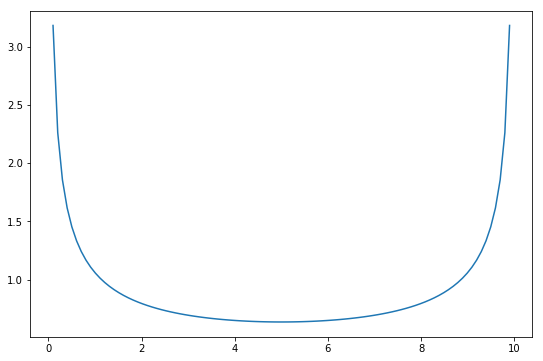

In [4]:
# unbounded difference quotients, don't sample using sifting
def get_beta(interval, cumulative_intensity, alpha=.5, beta=.5): 
    from scipy.stats import beta as beta_d
    a, b, beta = *interval, beta_d(alpha, beta)
    return lambda x: beta.pdf((x-a)/(b-a))*cumulative_intensity / (b-a)

f=generalize_pdf([0,10], 10, get_beta([0,1], 1))
assert allclose(quad(f, 0, 10)[0], 10)

d = list(np.linspace(0,10,100))
plt.plot(d, list(map(f,list(d))))
plt.show()


** Does this work? **






In [ ]:
# Generate by thinning from a strictly dominating homogeneous poisson process
# Needs two separate Unif[0,1] variates
def gen_NHPP_thinning(rate_func, a, b, rate_max):
    """ rate_func: is a rate function over (a,b)
        a,b: The open interval on which to sample our process
        l_max: a close upper bound of l over (a,b) """
    result, x_ = [], a
    
    while x_ < b:
        u1, u2 = rand(), rand()
        
        x_ += -log(u1)/rate_max # inverse of cdf of gamma(1,rate_max)
        p_keep = rate_func(x_) / rate_max
        if u2 < p_keep:
            result += [x_]

    return result[:-1] # last one is outside (a,b)

def plot(res, bins, f, title="", a=None, b=None):
    res,_ = list(res),pd.DataFrame({"(Possibly) Stacked Arrival Times": res}).plot(kind="hist", bins=bins)
    if a is None and b is None:
        a,b = min(res), max(res)
    print a,b
    plt.plot(np.linspace(a, b, 200), map(f, np.linspace(a, b, 200)))
    plt.title(title);plt.show()
    
    

In [ ]:
n=10
f = lambda x:4
all_arrivals = list(chain.from_iterable([gen_NHPP_thinning(f, 0, 30, 4) for i in range(n)]))
plot(all_arrivals, 30, lambda x:n*f(x), "Stacked Homogeneous PP, Rate = 40 over (0,30)")
print len(all_arrivals), " arrivals has MLE mu =", len(all_arrivals), " / 30*1000 = ", len(all_arrivals)/(30.*1000)
all_arrivals = list(chain.from_iterable([gen_NHPP_thinning(lambda x:np.abs(2*np.sin(x)), 0, 12, 2) for i in range(10)]))

# achtung! number of bins influences how high the counts appear
# for now use bins= approx (b-a)


